<a href="https://colab.research.google.com/github/NikhithaVarma/ML-Algos/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K Means Algorithm**

The way kmeans algorithm works is as follows: Specify number of clusters K. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing. Compute the sum of the squared distance between data points and all centroids. Assign each data point to the closest cluster (centroid). Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

**K means on Geyser Eruptions**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
#Importing the data
df=pd.read_csv("faithful.csv")
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [7]:
del df["Unnamed: 0"]
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [8]:
df.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [9]:
df.isnull().sum()

eruptions    0
waiting      0
dtype: int64

In [10]:
df=df.drop_duplicates()
df.dtypes

eruptions    float64
waiting        int64
dtype: object

Text(0.5, 1.0, 'Visualization of raw data')

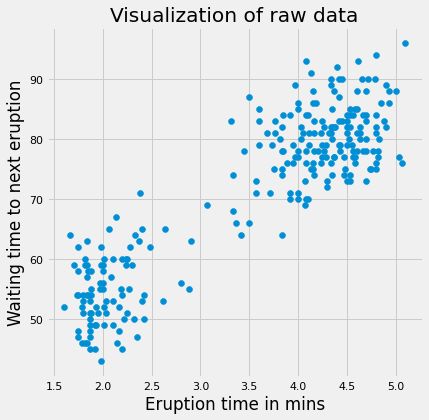

In [11]:
#Plot the data
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')

In [13]:
df.shape

(256, 2)

In [14]:
scaler=StandardScaler()
X_std=scaler.fit_transform(df) #scaling the data

In [15]:
km=KMeans(n_clusters=2) #applying k=2
km.fit(X_std)


KMeans(n_clusters=2)

In [16]:
centroids=km.cluster_centers_
centroids

array([[ 0.7008229 ,  0.6661763 ],
       [-1.27072284, -1.20790208]])

In [17]:
km.labels_

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int32)

In [18]:
km.inertia_

78.02178667251049

Text(0.5, 1.0, 'Visualization of clustered data')

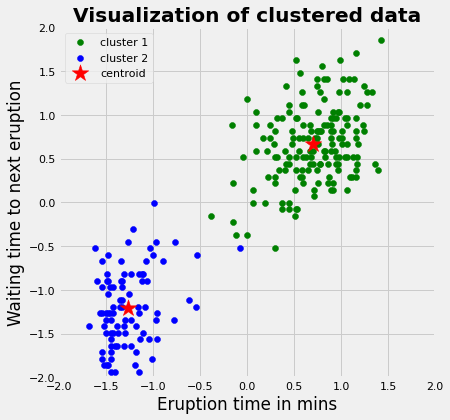

In [19]:
# #Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')

In [20]:
km=KMeans(n_clusters=4)
km.fit(X_std)

KMeans(n_clusters=4)

In [21]:
centroids=km.cluster_centers_
centroids

array([[-1.1933472 , -0.76509013],
       [ 0.58545563,  0.35870937],
       [ 0.85046905,  1.04858082],
       [-1.33205593, -1.51838184]])

In [22]:
km.inertia_

42.971437208580895

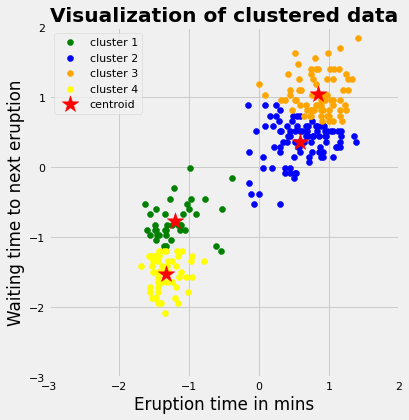

In [23]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
plt.scatter(X_std[km.labels_ == 3, 0], X_std[km.labels_ == 3, 1],
            c='yellow', label='cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-3, 2])
plt.ylim([-3, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

**Impact of initialisation**

33196
92743
72630
79665
82666
66346
91121
92162
57210


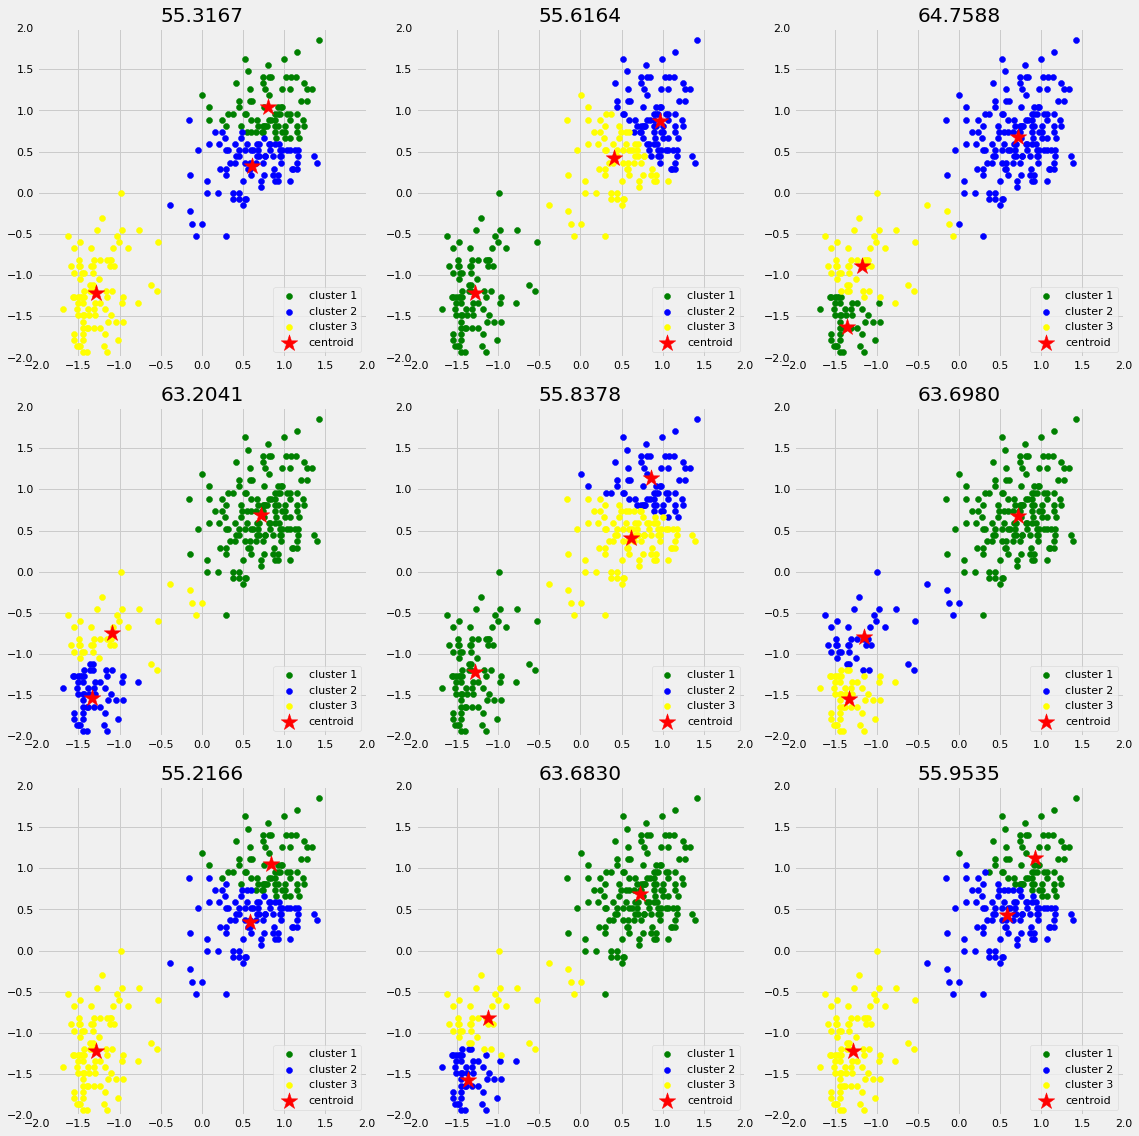

In [24]:
import numpy as np
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    seed = np.random.randint(0, 100000, size=1)[0]
    print(seed)
    km = KMeans(n_clusters=3,max_iter=3,init = 'random',n_init=1,random_state=np.random.RandomState(seed))
    km.fit(X_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
                  c='yellow', label='cluster 3')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

**Determining K**

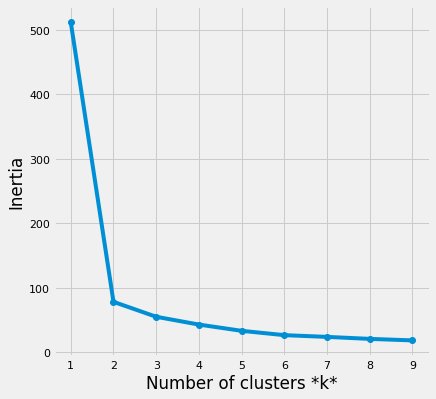

In [25]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []  # storer inertia for all values of k 
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

**Drawbacks of KMeans**

Does not let the data point far off from each other to be in the same cluster

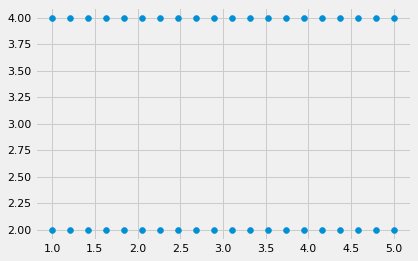

In [26]:
# Create horizantal data
X = np.tile(np.linspace(1, 5, 20), 2)
y = np.repeat(np.array([2, 4]), 20)
df = np.c_[X, y]

plt.scatter(X,y)

km = KMeans(n_clusters=2)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_


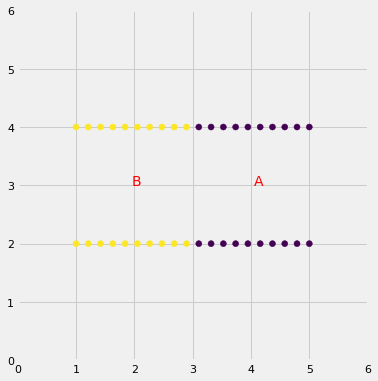

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X, y, c = labels)
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.text(centroids[0][0], centroids[0][1], 'A', color='red')
plt.text(centroids[1][0], centroids[1][1], 'B', color='red')
ax.set_aspect('equal')

Only can learn spherical clusters

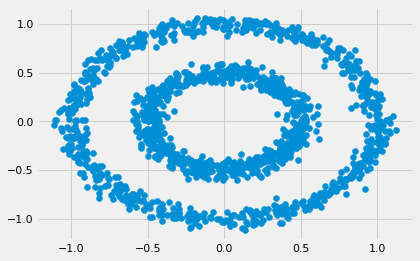

In [28]:
from sklearn.datasets import make_circles, make_moons
# Cricles
X1 = make_circles(factor=0.5, noise=0.05, n_samples=1500)

# Moons
X2 = make_moons(n_samples=1500, noise=0.05)

plt.scatter(X1[0][:, 0], X1[0][:, 1])



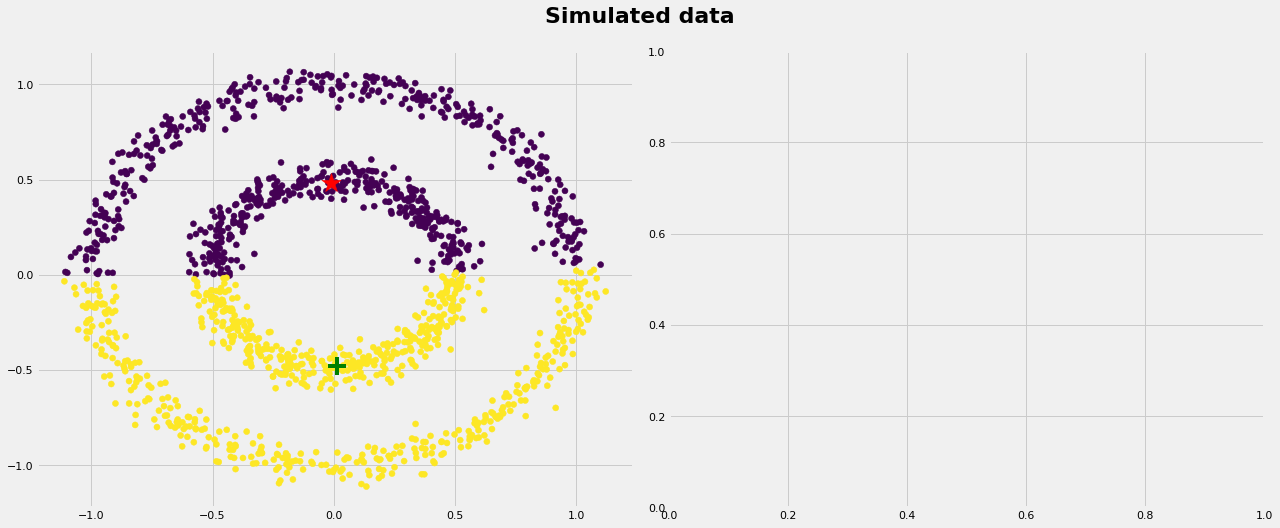

In [29]:
fig, ax = plt.subplots(1, 2)
for i, X in enumerate([X1]):
    fig.set_size_inches(18, 7)
    km = KMeans(n_clusters=2)
    km.fit(X[0])
    labels = km.predict(X[0])
    centroids = km.cluster_centers_

    ax[i].scatter(X[0][:, 0], X[0][:, 1], c=labels)
    ax[i].scatter(centroids[0, 0], centroids[0, 1], marker='*', s=400, c='r')
    ax[i].scatter(centroids[1, 0], centroids[1, 1], marker='+', s=300, c='green')
plt.suptitle('Simulated data', y=1.05, fontsize=22, fontweight='semibold')
plt.tight_layout()

In [30]:
km.predict([[-0.6,0.8]])

array([0], dtype=int32)